In [ ]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"120DXm92IJY_3NNRHpakD-q7jUCerg43E"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Iris.csv')        # replace the file name with your file

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import random;
import numpy as np;

In [ ]:
I = pd.read_csv('Iris.csv')
I

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris).

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:


1.   Id
2. SepalLengthCm
3. SepalWidthCm
4. PetalLengthCm
5. PetalWidthCm
6. Species



#Assignment 6 Multi-class classification and K-fold cross-validation (4)

1.   Code the Species as 0, 1, 2
2.   Shuffle the data
3.   Separate it into 10 equal sets
4.   Combine 7 sets as training set and 1 set as validation set and 2 sets as test set.
5.   Normalize the training set
6.   Write a code for multi-class logistic regression
7.   Test the performance on the validation set.
8.   Repat from step 4 to 7 eight times for all the 8 possible validation sets sets each time with a different validation set.
9.   Report the mean and standard deviation of the 8 cross-validation accuracies. Report the accuracy on the test-set. Use decision threshold of 0.5.
10. For the three classifiers that you have designed, construct the confusion matrix for 0.5 threshold and the ROC curve by changing the decision threshold from 0 to 1 with a step of 0.1. Which thresholds appear best for the three classifiers?


In [ ]:
#Replace Iris-Setosa by 0, Iris-versicolor as 1 and Iris-verginica as 2
for ind in I.index: 
    if I['Species'][ind] == 'Iris-setosa':
        I['Species'][ind] = 0
    elif I['Species'][ind] == 'Iris-versicolor':
        I['Species'][ind] = 1
    elif I['Species'][ind] == 'Iris-virginica':
        I['Species'][ind] = 2
    else:
        raise ValueError("More than 3 classes exist in dataset")
I


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
#Utiltiy Functions
def sigmoid(x):
  z = 1/(1 + np.exp(-x))
  return z;

#Converts 1,2,0 matrix to 1,0 matrix for given class_value
def create_class_matrix(Y,class_value):
    try:
        Y = Y.to_numpy()
    except:
        pass
    output = np.zeros((Y.shape[0],1))
    for i in range(Y.shape[0]):
        if Y[i]==class_value:
            output[i] = 1
    return output

#Utility function 
def logistic_prediction(X1,W1):
    return sigmoid(np.matmul(X1,W1))

#Does logistic Regression
#http://cse.iitrpr.ac.in/ckn/courses/f2018/csl603/w4.pdf
def logistic_regression(X,Y):
    ITERATIONS = 30
    W = np.random.rand(X.shape[1],1)
    N = X.shape[0]
    
    for iteri in range(1,ITERATIONS+1):
        R = np.zeros((N,N))
        for i in range(N):
            f_x = logistic_prediction(X[i],W)
            R[i,i] = f_x*(1-f_x)
        H = np.matmul(np.matmul(X.T,R),X)
        deltaJ = np.matmul(X.T, (logistic_prediction(X,W) - Y))
        try:
            W = W - np.matmul(np.linalg.inv(H),deltaJ)
        except:
             W = W - np.matmul(np.linalg.pinv(H),deltaJ)
    return W

#Multi Class Prediction for given classifier and datapoint 
def multi_class_prediction(w0,w1,w2,x):       #W are in order 0 1 2
    p0 = logistic_prediction(x,w0)
    p1 = logistic_prediction(x,w1)
    p2 = logistic_prediction(x,w2)
    if p0>p1 and p0>p2:
        return 0
    if p1>p0 and p1>p2:
        return 1
    return 2

#Single Class Prediction for given classifier and datapoint with threshold
def single_class_prediction(w,x,therhold = 0.5):
    p = logistic_prediction(x,w)
    if p>=therhold:
        return 1
    else:
        return 0

#Returns Classifiers: W0,W1,W2
def multiClass_logistic_regression(X,Y):
    X = X.to_numpy()
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis = 1)
    Y = Y.to_numpy()
    Y0 = create_class_matrix(Y,0)
    Y1 = create_class_matrix(Y,1)
    Y2 = create_class_matrix(Y,2)
    W0 = logistic_regression(X,Y0)
    W1 = logistic_regression(X,Y1)
    W2 = logistic_regression(X,Y2)
    return W0,W1,W2

#Calculates Accuracy on given dataset for multi-class classification
def calculate_accuracy(X,Y,w0,w1,w2):
    X = X.to_numpy()
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis = 1)
    Y = Y.to_numpy()
    N = X.shape[0]
    correct = 0.0
    for i in range(N):
        predicted = multi_class_prediction(w0,w1,w2,X[i])
        actual    = Y[i]
        if predicted==actual:
            correct +=1
    return correct/N

#Returns Confustion matrix for given classifier on the dataset with threshold
def Confusion_matrix(W,X,Y,threshold = 0.5):
    try:
        X = X.to_numpy()
    except:
        pass
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis = 1)
    try:
        Y = Y.to_numpy()
    except:
        pass
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    N = X.shape[0]
    for i in range(N):
        predicted_class = single_class_prediction(W,X[i],threshold)
        actual_class    = Y[i]
        if actual_class == 1 and predicted_class ==1:
            tp +=1
        if actual_class == 1 and predicted_class ==0:
            fn +=1
        if actual_class == 0 and predicted_class ==1:
            fp +=1
        if actual_class == 0 and predicted_class ==0:
            tn +=1
    return np.asarray([[tp,fn],[fp,tn]])

#Returns fpr and tpr
def roc_values(W,X,Y,threshold = 0.5):
    mat = Confusion_matrix(W,X,Y,threshold)
    tpr = float(mat[0,0])/(mat[0,0]+mat[0,1])
    fpr = float(mat[1,0])/(mat[1,0]+mat[1,1])
    return tpr,fpr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Confusion Matrices--
[[12  0]
 [ 0 18]]
[[ 1  8]
 [ 7 14]]
[[ 9  0]
 [ 1 20]]


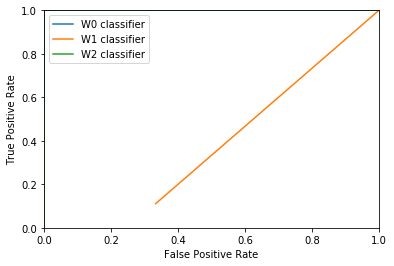

---


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Confusion Matrices--
[[12  0]
 [ 0 18]]
[[ 4  5]
 [10 11]]
[[ 9  0]
 [ 1 20]]


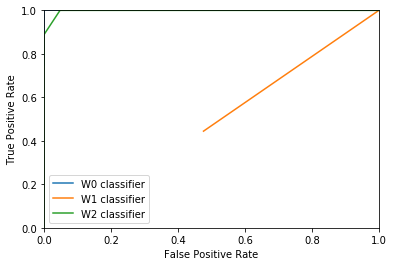

---


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Confusion Matrices--
[[12  0]
 [ 0 18]]
[[ 7  2]
 [11 10]]
[[ 9  0]
 [ 1 20]]


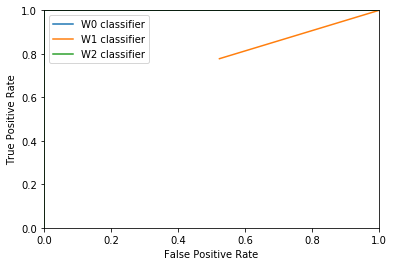

---


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Confusion Matrices--
[[12  0]
 [ 0 18]]
[[ 7  2]
 [13  8]]
[[ 9  0]
 [ 1 20]]


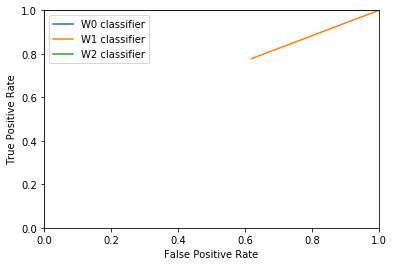

---
Confusion Matrices--
[[12  0]
 [ 0 18]]
[[ 6  3]
 [ 3 18]]
[[ 9  0]
 [ 1 20]]


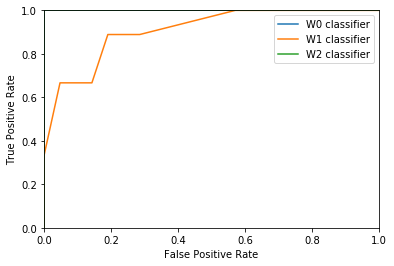

---


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Confusion Matrices--
[[ 2 10]
 [ 0 18]]
[[ 6  3]
 [ 2 19]]
[[ 9  0]
 [ 0 21]]


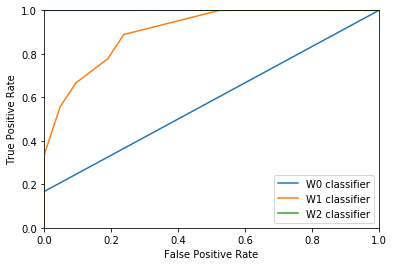

---


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Confusion Matrices--
[[12  0]
 [ 0 18]]
[[ 9  0]
 [11 10]]
[[ 9  0]
 [ 1 20]]


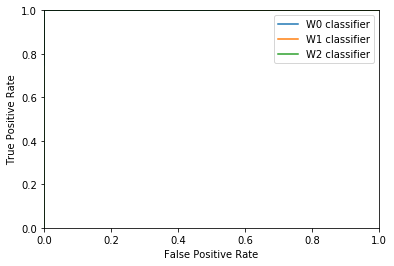

---


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Confusion Matrices--
[[12  0]
 [ 0 18]]
[[ 9  0]
 [ 9 12]]
[[ 9  0]
 [ 1 20]]


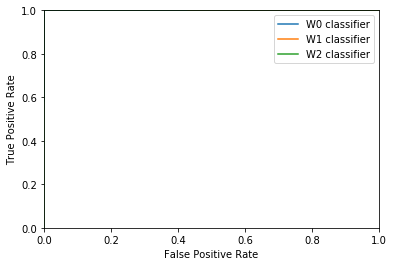

---
Validation Accuracies [0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.26666666666666666, 0.9333333333333333, 0.8666666666666667, 0.6666666666666666, 0.4666666666666667] Mean acc: 0.5666666666666667 Std deviation: 0.23804761428476168


In [ ]:
#Shuffle the dataset
from sklearn.utils import shuffle
I = shuffle(I)

X = I[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = I['Species']

#Split the dataset in to 10 
K = 10
import numpy as np
X = np.split(X,K)
Y = np.split(Y,K)


Validation_acc = list()
test_acc       = list()

for validation_index in range(8):
    X_Validation = X[validation_index]
    Y_Validation = Y[validation_index]
    X_Train = list()
    Y_Train = list()
    for i in range(10):
        if i==validation_index:
            continue
        X_Train.append(X[i])
        Y_Train.append(Y[i])
            
        
    X_Train = pd.concat(X_Train)
    Y_Train = pd.concat(Y_Train)
    X_Test = pd.concat(X[8:10])
    Y_Test = pd.concat(Y[8:10])

    #Normalize Train,Validation and Test all columns except ID
    mean = np.mean(X_Train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
    std  = np.std(X_Train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
    X_Train = (X_Train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] - mean)/std
    X_Test = (X_Test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] - mean)/std
    X_Validation = (X_Validation[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] - mean)/std

    #Regressors
    W0,W1,W2 = multiClass_logistic_regression(X_Train,Y_Train)

    #Accuracy
    val_accuracy  = calculate_accuracy(X_Validation,Y_Validation,W0,W1,W2)
    test_accuracy = calculate_accuracy(X_Test,Y_Test,W0,W1,W2)
    Validation_acc.append(val_accuracy)

    #Confustion Matrix Work
    Y0 = create_class_matrix(Y_Test,0)
    Y1 = create_class_matrix(Y_Test,1)
    Y2 = create_class_matrix(Y_Test,2)
    print("Confusion Matrices--")
    mat0 = Confusion_matrix(W0,X_Test,Y0, 0.5)
    mat1 = Confusion_matrix(W1,X_Test,Y1, 0.5)
    mat2 = Confusion_matrix(W2,X_Test,Y2, 0.5)
    print(mat0)
    print(mat1)
    print(mat2)
    

    #ROC work
    tpr_w0_list = list()
    fpr_w0_list = list()

    tpr_w1_list = list()
    fpr_w1_list = list()

    tpr_w2_list = list()
    fpr_w2_list = list()
    
    for thresh in range(0,11,1):
        thresh = float(thresh)/10
        tpr_w0,fpr_w0 = roc_values(W0,X_Test,Y0,thresh)
        tpr_w1,fpr_w1 = roc_values(W1,X_Test,Y1,thresh)
        tpr_w2,fpr_w2 = roc_values(W2,X_Test,Y2,thresh)

        tpr_w0_list.append(tpr_w0)
        fpr_w0_list.append(fpr_w0)
        tpr_w1_list.append(tpr_w1)
        fpr_w1_list.append(fpr_w1)
        tpr_w2_list.append(tpr_w2)
        fpr_w2_list.append(fpr_w2)
    
    

    #ROC Graph Work
    plt.clf()
    plt.plot(fpr_w0_list,tpr_w0_list,label = 'W0 classifier')
    plt.plot(fpr_w1_list,tpr_w1_list,label = 'W1 classifier')
    plt.plot(fpr_w2_list,tpr_w2_list,label = 'W2 classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.legend()
    plt.show()
    print("---")

print("Validation Accuracies",Validation_acc, "Mean acc:",np.mean(Validation_acc),"Std deviation:",np.std(Validation_acc))






     

